In [1]:
# downloading the data
! wget https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative -O data.csv

--2021-04-12 23:00:28--  https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative
Resolving exoplanetarchive.ipac.caltech.edu (exoplanetarchive.ipac.caltech.edu)... 134.4.54.151
Connecting to exoplanetarchive.ipac.caltech.edu (exoplanetarchive.ipac.caltech.edu)|134.4.54.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘data.csv’

data.csv                [    <=>             ]   3.03M  3.90MB/s    in 0.8s    

2021-04-12 23:00:30 (3.90 MB/s) - ‘data.csv’ saved [3179148]



In [7]:
%reload_ext autoreload
%autoreload 2
from observation import ObservationPlanner
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.coordinates import EarthLocation

In [8]:
df = pd.read_csv('data.csv')
print("Available columns: \n", list(df.columns))

Available columns: 
 ['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra_str', 'dec_str', 'koi_kepmag', 'koi_kepmag_err']


In [9]:
# selecting N brighest objects
N = 50

filtered_df = df[(df.koi_disposition == 'CONFIRMED') & (df.koi_pdisposition == 'CANDIDATE')
  ].sort_values(by = 'koi_kepmag').head(N)[
    ['kepid', 'kepler_name','koi_period', 'ra_str', 'dec_str', 'koi_kepmag']
].reset_index(drop=True)

filtered_df

,kepid,kepler_name,koi_period,ra_str,dec_str,koi_kepmag
0,3632418,Kepler-21 A b,2.785821,19h09m26.84s,+38d42m50.5s,8.224
1,6278762,Kepler-444 A e,7.743478,19h19m00.55s,+41d38m04.6s,8.717
2,6278762,Kepler-444 A c,4.545870,19h19m00.55s,+41d38m04.6s,8.717
3,6278762,Kepler-444 A d,6.189440,19h19m00.55s,+41d38m04.6s,8.717
4,6278762,Kepler-444 A f,9.740485,19h19m00.55s,+41d38m04.6s,8.717
5,6278762,Kepler-444 A b,3.600117,19h19m00.55s,+41d38m04.6s,8.717
6,10963065,Kepler-408 b,2.465024,18h59m08.69s,+48d25m23.6s,8.769
7,10748390,Kepler-3 b,4.887803,19h50m50.24s,+48d04m51.1s,9.174
8,8866102,Kepler-410 A b,17.833678,18h52m36.17s,+45d08m23.4s,9.364
9,9955598,Kepler-409 b,68.958447,19h34m43.01s,+46d51m09.9s,9.439


In [10]:
loc = EarthLocation.of_site('McDonald Observatory')

In [13]:
obs = ObservationPlanner(date_midnight_utc = '2021-5-15 00:00:00', utc_offset = -5*u.hour, loc = loc)
coords = filtered_df[["ra_str", "dec_str"]].to_numpy()
alts = np.array(list(obs.astro_twilight_altitudes_for(coords)))

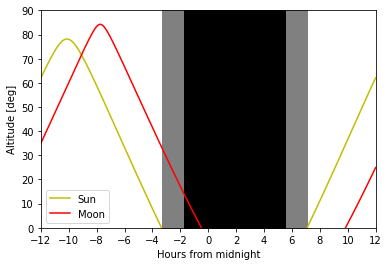

In [14]:
obs.plot_alt_vs_hours()

"In astronomy and radiometry, phase angle is used to mean the angle between a light source and the observer as seen from an illuminated surface. For Earth-based observations of the Moon this is typically taken as the angle between the center of the Sun and the center of the Earth as seen from the center of the Moon." https://the-moon.us/wiki/Phase_angle

This corresponds to the waxing crescent phase according to https://www.moonpage.com/. Apparently, Astroplan doesn't follow the sign convention in the phase angle, so it is not possible to distinguish between waning and waxing phases.

In [15]:
obs.print_moon_info()

Phase angle: 142.72 deg
Illumination: 10.22%


In [16]:
# maximum altitude reached during astronomical twilight
alt_obs_threshold = 30
filtered_df['max_alt'] = np.max(alts, axis=1)
filtered_df['visible'] = filtered_df.max_alt > 0
filtered_df['low_airmass'] = filtered_df.max_alt > 30
filtered_df

,kepid,kepler_name,koi_period,ra_str,dec_str,koi_kepmag,max_alt,visible,low_airmass
0,3632418,Kepler-21 A b,2.785821,19h09m26.84s,+38d42m50.5s,8.224,81.896684,True,True
1,6278762,Kepler-444 A e,7.743478,19h19m00.55s,+41d38m04.6s,8.717,78.698472,True,True
2,6278762,Kepler-444 A c,4.545870,19h19m00.55s,+41d38m04.6s,8.717,78.698472,True,True
3,6278762,Kepler-444 A d,6.189440,19h19m00.55s,+41d38m04.6s,8.717,78.698472,True,True
4,6278762,Kepler-444 A f,9.740485,19h19m00.55s,+41d38m04.6s,8.717,78.698472,True,True
5,6278762,Kepler-444 A b,3.600117,19h19m00.55s,+41d38m04.6s,8.717,78.698472,True,True
6,10963065,Kepler-408 b,2.465024,18h59m08.69s,+48d25m23.6s,8.769,72.223160,True,True
7,10748390,Kepler-3 b,4.887803,19h50m50.24s,+48d04m51.1s,9.174,70.570184,True,True
8,8866102,Kepler-410 A b,17.833678,18h52m36.17s,+45d08m23.4s,9.364,75.509288,True,True
9,9955598,Kepler-409 b,68.958447,19h34m43.01s,+46d51m09.9s,9.439,72.865292,True,True


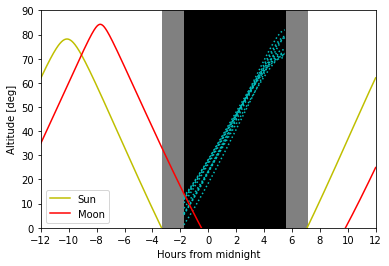

In [17]:
shortest_period_df = filtered_df[filtered_df.visible].sort_values(by = 'koi_period').head(10).reset_index(drop=True)
coords = shortest_period_df[["ra_str", "dec_str"]].to_numpy()
obs.plot_alt_vs_hours(coords)

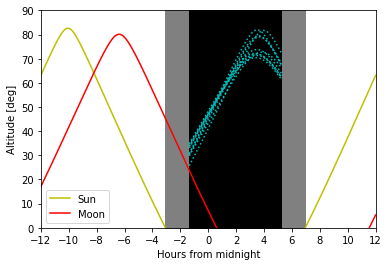

In [18]:
obs_next = ObservationPlanner(date_midnight_utc = '2021-6-15 00:00:00', utc_offset = -5*u.hour, loc = loc)
obs_next.plot_alt_vs_hours(coords)

In [19]:
alts = np.array(list(obs_next.astro_twilight_altitudes_for(coords)))
shortest_period_df['max_alt'] = np.max(alts, axis=1)
shortest_period_df['visible'] = shortest_period_df.max_alt > 0
shortest_period_df['low_airmass'] = shortest_period_df.max_alt > 30

shortest_period_df

,kepid,kepler_name,koi_period,ra_str,dec_str,koi_kepmag,max_alt,visible,low_airmass
0,11904151,Kepler-10 b,0.837491,19h02m43.05s,+50d14m28.7s,10.961,70.400939,True,True
1,9941662,Kepler-13 b,1.763588,19h07m53.09s,+46d52m06.1s,9.958,73.771046,True,True
2,11127479,Kepler-1349 b,2.128216,19h05m21.20s,+48d44m38.8s,11.126,71.896809,True,True
3,5866724,Kepler-65 b,2.154911,19h14m45.29s,+41d09m04.2s,11.018,79.484239,True,True
4,10666592,Kepler-2 b,2.204735,19h28m59.35s,+47d58m10.3s,10.463,72.660185,True,True
5,10963065,Kepler-408 b,2.465024,18h59m08.69s,+48d25m23.6s,8.769,72.220321,True,True
6,11446443,Kepler-1 b,2.470613,19h07m14.03s,+49d18m59.0s,11.338,71.323624,True,True
7,3632418,Kepler-21 A b,2.785821,19h09m26.84s,+38d42m50.5s,8.224,81.924505,True,True
8,6278762,Kepler-444 A b,3.600117,19h19m00.55s,+41d38m04.6s,8.717,78.999049,True,True
9,3861595,Kepler-1658 b,3.849372,19h37m25.57s,+38d56m50.6s,11.432,81.678118,True,True


In [20]:
obs_next.print_moon_info()

Phase angle: 125.89 deg
Illumination: 20.69%
